# Convolutional Neural Network

Download data : https://www.kaggle.com/competitions/dogs-vs-cats/data

- Where we are dealing with vision based data

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding=)(inputs)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10,activation='softmax')(x)
model = keras.Model(inputs=inputs,outputs=outputs)


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
 # 128*3*3

In [7]:
# import tensorflow as tf

In [8]:
# import numpy as np

In [1]:
from tensorflow.keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255


model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [10]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0253 - accuracy: 0.9920
Test Accuracy: 0.9919999837875366


## Convolution Operation

## Key Characteristics of CNN

- The patterns they learn are translation-invariant
- They can learn spatial hierarchies of patterns

### 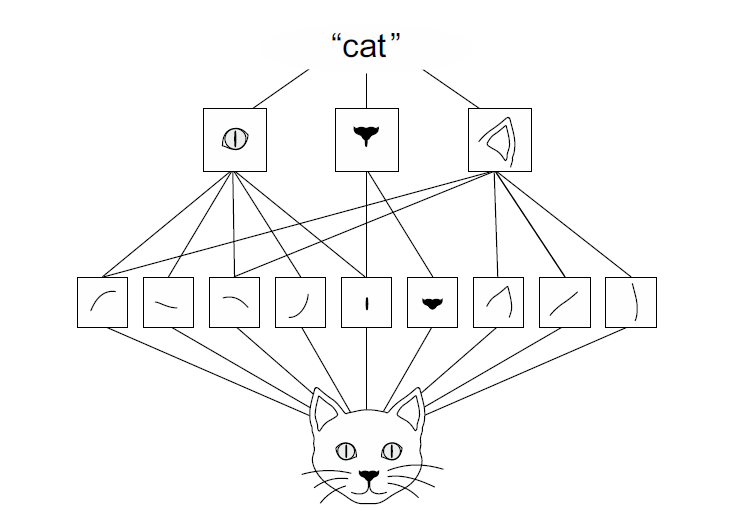

- convolution operate over rank-3 tensors called feature maps with two spatial axes (height and width) as well as depth(channel)
- RGB : 3 , Grey: 1

## what is convolution

In [11]:
# inputs = keras.Input(shape=(28,28,1))
# x = layers.Conv2D(filters=32,kernel_size=3,activation='relu')(inputs)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10,activation='softmax')(x)
# model = keras.Model(inputs=inputs,outputs=outputs)

### 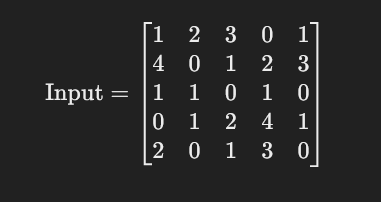

In [ ]:
filter = 3*3x`x

### 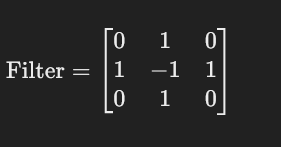

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [16]:
# 28-3+1

### 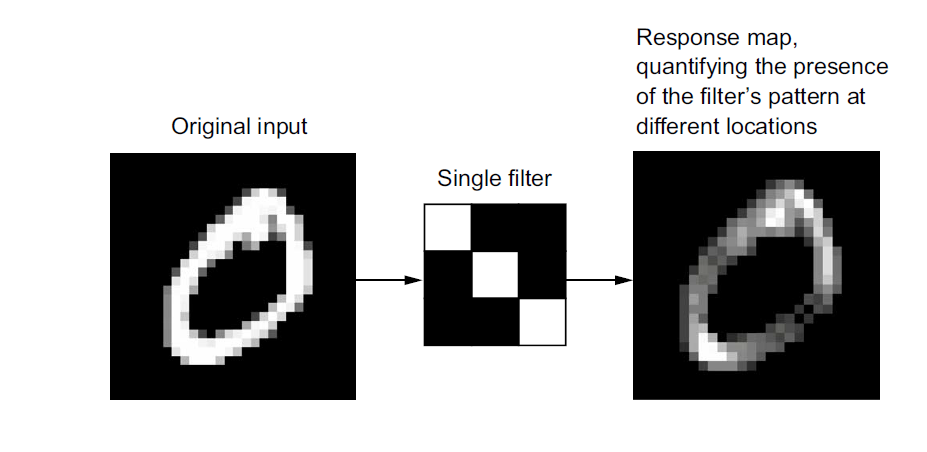

### - 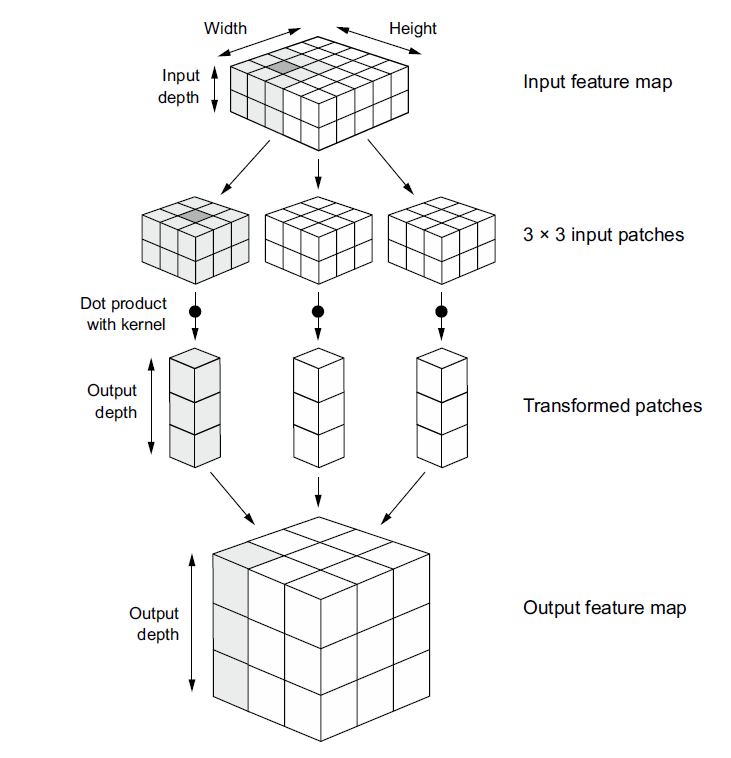

### Padding and Stride

###  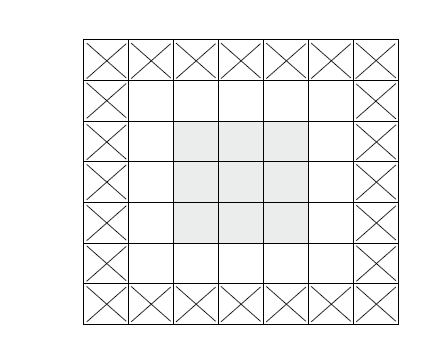

### 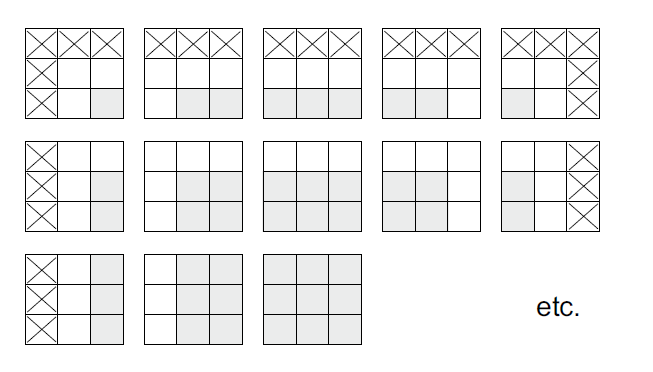

## Max Pooling 

In [2]:
# inputs = keras.Input(shape=(28,28,1))
# x = layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding=)(inputs)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10,activation='softmax')(x)
# model = keras.Model(inputs=inputs,outputs=outputs)


- Categorcial Crossentropy: One hot encoded vectors(labels)
- Sparse cross entropy : integer encoded

In [3]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model_no_max_pool.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainable

- It isn’t conducive to learning a spatial hierarchy of features. The 3 × 3 windows
in the third layer will only contain information coming from 7 × 7 windows in
the initial input. The high-level patterns learned by the convnet will still be very
small with regard to the initial input, which may not be enough to learn to classify
digits (try recognizing a digit by only looking at it through windows that are
7 × 7 pixels!). We need the features from the last convolution layer to contain
information about the totality of the input.


-  The final feature map has 22 × 22 × 128 = 61,952 total coefficients per sample.
This is huge. When you flatten it to stick a Dense layer of size 10 on top, that
layer would have over half a million parameters. This is far too large for such a
small model and would result in intense overfitting.

In [ ]:
!kaggle competitions download -c dogs-vs-cats

- Training: 20000 (1000 for Dog and 1000 for Cat)
- validation 1000 (500>dogs, 500>cats)
- test > 20000 (1000 for Dog and 1000 for Cat)


In [1]:
import os,shutil,pathlib

In [2]:
# !dir

In [3]:
# !dir cd D:\Codeme\Deep_Learning\train

In [4]:
# !dir cd D:\Codeme\Deep_Learning

In [5]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [43]:
# new_base_dir

In [44]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category 
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,dst=dir / fname)

In [45]:
make_subset('train',start_index=0,end_index=1000)
make_subset('validation',start_index=0,end_index=1500)
make_subset('test',start_index=1500,end_index=2500)

## Model Building

- output feature map
- feature map depth increase 

#### creating a small convnet for classifying dogs vs cats

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
inputs = keras.Input(shape=(180,180,3),name='input1')
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs,outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input1 (InputLayer)         [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [9]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## Data Preprocessing

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

In [11]:
train_dataset = image_dataset_from_directory(new_base_dir / 'train',image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / 'validation',image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / 'test',image_size=(180,180),batch_size=32)

Found 2000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### test model 

In [268]:
img_paths = ['cat.5.jpg', 'dog3.jpg', 'dog2.jpg','dog1.jpg']  # Add multiple image paths
img_array = np.array([image.img_to_array(image.load_img(path, target_size=(180, 180))) / 255.0 for path in img_paths])

trained_model = keras.models.load_model('convnet_from_scratch_with_augmentation.tf')
predictions = trained_model.predict(img_array)

for i, pred in enumerate(predictions):
    confidence = pred[0]
    predicted_class = 1 if confidence >= 0.5 else 0
    print(f"Image {i}: Predicted class = {predicted_class}, Confidence = {confidence:.2f}")

1/1 [==============================] - 1s 503ms/step
Image 0: Predicted class = 0, Confidence = 0.00
Image 1: Predicted class = 0, Confidence = 0.00
Image 2: Predicted class = 0, Confidence = 0.00
Image 3: Predicted class = 0, Confidence = 0.00


In [159]:
trained_model.evaluate(validation_dataset)

94/94 [==============================] - 3s 21ms/step - loss: 0.2336 - accuracy: 0.9297


[0.2335597723722458, 0.9296666383743286]

In [177]:
# img_path = 'dog1.jpg'
# img = image.load_img(img_path,target_size=(180,180))
# img_array= image.img_to_array(img)
# img_array1 = img_array/255.0
# # img_array1 = np.expand_dims(img_array,axis=0)\


# img_path = 'cat.5.jpg'
# img = image.load_img(img_path,target_size=(180,180))
# img_array= image.img_to_array(img)
# img_array2 = img_array/255.0
# # img_array2 = np.expand_dims(img_array,axis=0)


# batch_array = np.stack([img_array1,img_array2])

# augmented_img_array = data_augmentation(img_array)

trained_model = keras.models.load_model('convnet_from_scratch_with_augmentation.tf')

predictions = trained_model.predict(two_images)

predicted_class = (predictions >= 0.5).astype("int32")




1/1 [==============================] - 0s 110ms/step


In [174]:
for image_batch,label_batch in  test_dataset.take(1):
    two_images = image_batch[:2]

In [176]:
two_images.shape

TensorShape([2, 180, 180, 3])

In [170]:
batch_array.shape

(2, 1, 180, 180, 3)

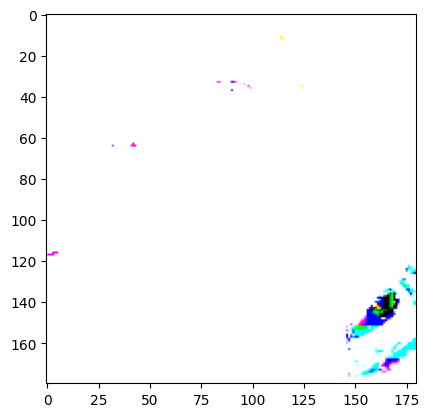

In [182]:
plt.imshow(two_images[0])

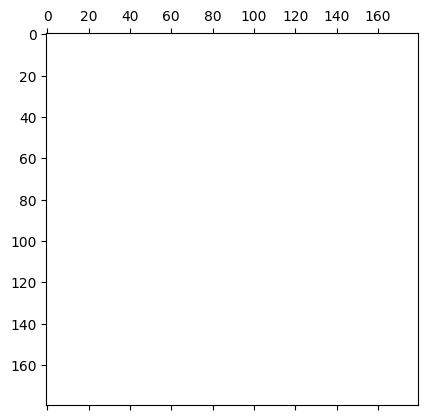

In [181]:
plt.matshow(two_images[1])

In [199]:
for image_batch,label_batch in  test_dataset.take(1):
    two_images = image_batch[2:4]

In [211]:
two_images[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[190.78703 , 168.12038 , 114.23148 ],
        [209.3074  , 165.35927 , 112.28148 ],
        [205.49445 , 170.23828 , 109.90494 ],
        ...,
        [131.8317  , 143.27615 ,  64.09707 ],
        [106.46324 , 121.74458 ,  42.8485  ],
        [105.93429 , 129.97623 ,  38.071922]],

       [[197.1926  , 175.52592 , 117.88333 ],
        [208.84444 , 167.69444 , 110.844444],
        [199.22037 , 164.56296 , 102.312965],
        ...,
        [127.639114, 138.08357 ,  64.60941 ],
        [112.22795 , 124.27785 ,  57.389057],
        [112.79609 , 129.55159 ,  57.883087]],

       [[203.91049 , 183.09875 , 118.700615],
        [206.30556 , 171.05556 , 109.30556 ],
        [201.69136 , 169.57407 , 105.0247  ],
        ...,
        [126.614365, 134.53413 ,  77.08653 ],
        [118.000244, 125.25023 ,  78.78722 ],
        [115.84238 , 123.32071 ,  80.93185 ]],

       ...,

       [[178.87311 , 197.78983 ,  85.12608 ],
        [155.

In [329]:
img_path = 'dog11.jpg'
img = image.load_img(img_path,target_size=(180,180))

img_array= image.img_to_array(img)
final_image = tf.convert_to_tensor(img_array)
# final_image = data_augmentation(final_image)

# final_image = final_image/255.0

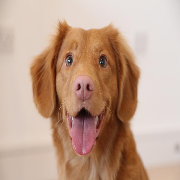

In [330]:
img

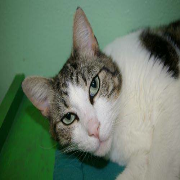

In [306]:
out = np.array(two_images[1]).astype(np.uint8)
out = Image.fromarray(out)
out

In [331]:
final_final = tf.expand_dims(final_image,axis=0)

trained_model = keras.models.load_model('convnet_from_scratch_with_augmentation.tf')

predictions = trained_model.predict(final_final)

predicted_class = (predictions >= 0.5).astype("int32")

predicted_class

1/1 [==============================] - 0s 87ms/step


array([[1]])

In [332]:
predictions

array([[0.9990031]], dtype=float32)

In [261]:
np.array(img).shape

(180, 180, 3)

In [245]:
import tensorflow as tf

In [243]:
type(img)

PIL.Image.Image

In [251]:
final_final = tf.expand_dims(final_image,axis=0)

In [234]:
final_final.shape

TensorShape([1, 180, 180, 3])

In [299]:
o = np.array(two_images[0]).astype(np.uint8)


In [300]:
out = Image.fromarray(o)

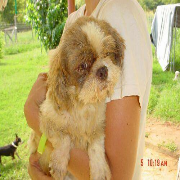

In [301]:
out

In [253]:
trained_model = keras.models.load_model('convnet_from_scratch_with_augmentation.tf')

predictions = trained_model.predict(final_final)

predicted_class = (predictions >= 0.5).astype("int32")

1/1 [==============================] - 0s 104ms/step


In [254]:
predictions

array([[1.0531996e-10]], dtype=float32)

In [255]:
predicted_class

array([[0]])

In [173]:
predictions

array([[8.899026e-11],
       [9.014389e-11]], dtype=float32)

In [12]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
# for i in train_dataset:
#     print(i[0])

In [14]:
for data_batch,labels_batch in train_dataset:
    print('data batch shape: ',data_batch.shape)
    print('labels batch shape: ',labels_batch.shape)
    break 

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.tf',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.7683 - accuracy: 0.5280

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 23s 113ms/step - loss: 0.7683 - accuracy: 0.5280 - val_loss: 0.6887 - val_accuracy: 0.5047
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.7007 - accuracy: 0.5385

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 94ms/step - loss: 0.7007 - accuracy: 0.5385 - val_loss: 0.6861 - val_accuracy: 0.6130
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5990

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 93ms/step - loss: 0.6833 - accuracy: 0.5990 - val_loss: 0.6444 - val_accuracy: 0.6213
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6497 - accuracy: 0.6450

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 94ms/step - loss: 0.6497 - accuracy: 0.6450 - val_loss: 0.6021 - val_accuracy: 0.6703
Epoch 5/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6443 - accuracy: 0.6775 - val_loss: 1.2765 - val_accuracy: 0.5327
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.7055

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 93ms/step - loss: 0.5699 - accuracy: 0.7055 - val_loss: 0.5796 - val_accuracy: 0.6813
Epoch 7/30
62/63 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7273

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 92ms/step - loss: 0.5339 - accuracy: 0.7270 - val_loss: 0.5488 - val_accuracy: 0.7370
Epoch 8/30
62/63 [============================>.] - ETA: 0s - loss: 0.4785 - accuracy: 0.7676

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 95ms/step - loss: 0.4797 - accuracy: 0.7670 - val_loss: 0.4983 - val_accuracy: 0.7603
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.8015

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 96ms/step - loss: 0.4582 - accuracy: 0.8015 - val_loss: 0.4354 - val_accuracy: 0.8097
Epoch 10/30
62/63 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8271

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 92ms/step - loss: 0.3931 - accuracy: 0.8285 - val_loss: 0.4046 - val_accuracy: 0.8220
Epoch 11/30
63/63 [==============================] - 5s 74ms/step - loss: 0.3554 - accuracy: 0.8450 - val_loss: 0.4605 - val_accuracy: 0.7893
Epoch 12/30
63/63 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.8760

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 96ms/step - loss: 0.2934 - accuracy: 0.8760 - val_loss: 0.3483 - val_accuracy: 0.8627
Epoch 13/30
63/63 [==============================] - 5s 75ms/step - loss: 0.2330 - accuracy: 0.9030 - val_loss: 0.3484 - val_accuracy: 0.8697
Epoch 14/30
62/63 [============================>.] - ETA: 0s - loss: 0.2057 - accuracy: 0.9254

INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch.tf\assets


63/63 [==============================] - 6s 93ms/step - loss: 0.2042 - accuracy: 0.9260 - val_loss: 0.3392 - val_accuracy: 0.8917
Epoch 15/30
63/63 [==============================] - 5s 75ms/step - loss: 0.1477 - accuracy: 0.9425 - val_loss: 0.3743 - val_accuracy: 0.8833
Epoch 16/30
63/63 [==============================] - 5s 76ms/step - loss: 0.1243 - accuracy: 0.9540 - val_loss: 0.5642 - val_accuracy: 0.8520
Epoch 17/30
63/63 [==============================] - 5s 75ms/step - loss: 0.1078 - accuracy: 0.9610 - val_loss: 0.3917 - val_accuracy: 0.8957
Epoch 18/30
63/63 [==============================] - 5s 74ms/step - loss: 0.0865 - accuracy: 0.9700 - val_loss: 0.5467 - val_accuracy: 0.8737
Epoch 19/30
63/63 [==============================] - 5s 76ms/step - loss: 0.0937 - accuracy: 0.9700 - val_loss: 0.5032 - val_accuracy: 0.8880
Epoch 20/30
63/63 [==============================] - 5s 75ms/step - loss: 0.0631 - accuracy: 0.9775 - val_loss: 0.5506 - val_accuracy: 0.8883
Epoch 21/30
63/63 

In [16]:
# - Modelcheckpoint : 1.5 ,1.7,1.3 
# - Early stoping : 1.5.1.3,1.,0.5,0.3,0.4

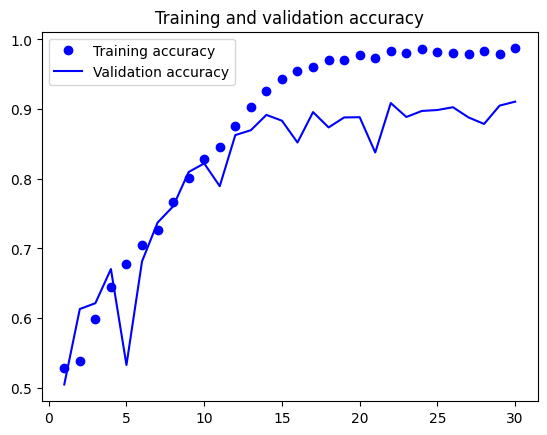

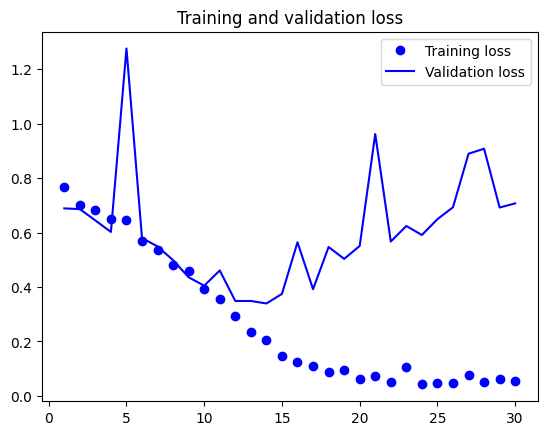

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [18]:
test_model = keras.models.load_model('convnet_from_scratch.tf')

In [19]:
test_acc,test_loss = test_model.evaluate(test_dataset)

63/63 [==============================] - 2s 22ms/step - loss: 0.7884 - accuracy: 0.7470


### Data Augmentation

In [20]:
import matplotlib.pyplot as plt

### 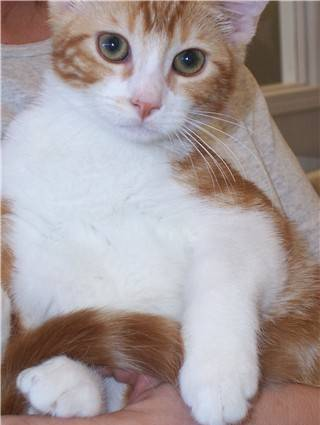

### 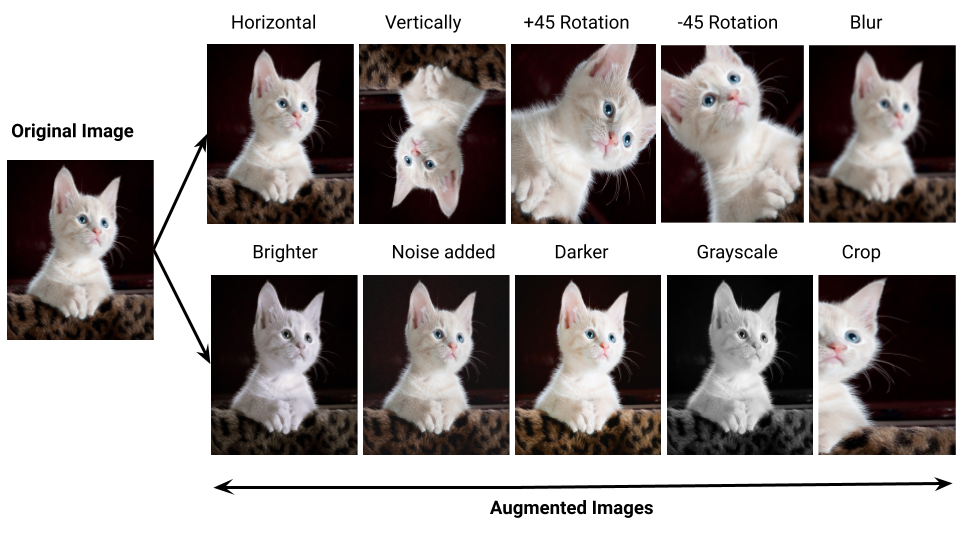

In [35]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

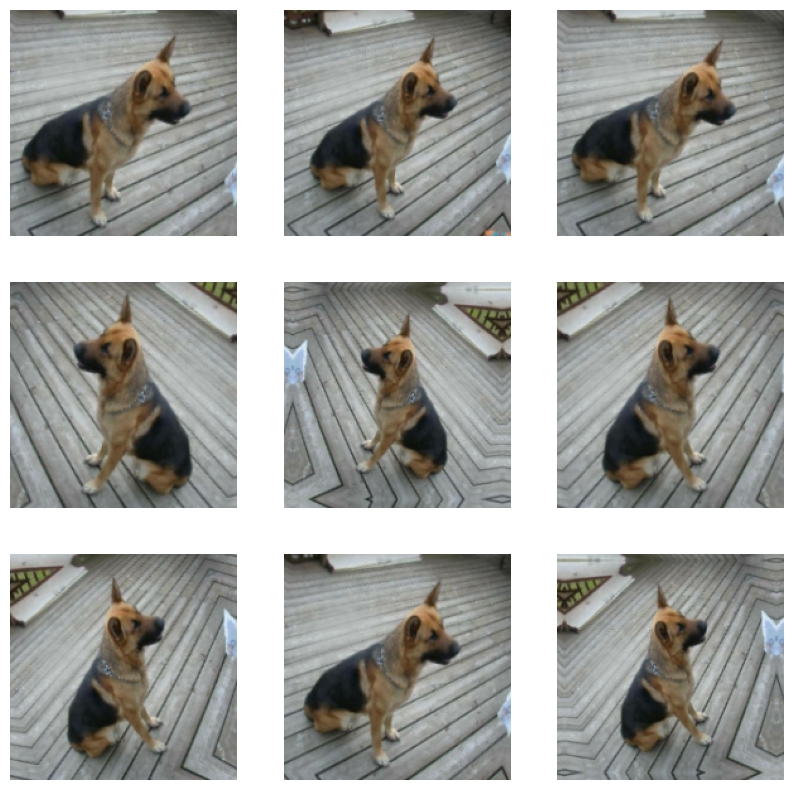

In [37]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [38]:
inputs = keras.Input(shape=(180,180,3),name='input1')
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs,outputs=outputs)

In [39]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [41]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [40]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation.tf',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset,epochs=100,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - ETA: 0s - loss: 0.7187 - accuracy: 0.5150WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 28s 373ms/step - loss: 0.7187 - accuracy: 0.5150 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 17s 258ms/step - loss: 0.7160 - accuracy: 0.5405 - val_loss: 0.6946 - val_accuracy: 0.5233
Epoch 3/100
63/63 [==============================] - 16s 256ms/step - loss: 0.7005 - accuracy: 0.5635 - val_loss: 0.7226 - val_accuracy: 0.5173
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5785WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 378ms/step - loss: 0.6889 - accuracy: 0.5785 - val_loss: 0.6591 - val_accuracy: 0.5803
Epoch 5/100
63/63 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.6095WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 25s 383ms/step - loss: 0.6574 - accuracy: 0.6095 - val_loss: 0.6241 - val_accuracy: 0.6553
Epoch 6/100
63/63 [==============================] - ETA: 0s - loss: 0.6512 - accuracy: 0.6490WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 25s 383ms/step - loss: 0.6512 - accuracy: 0.6490 - val_loss: 0.6112 - val_accuracy: 0.6630
Epoch 7/100
63/63 [==============================] - 17s 259ms/step - loss: 0.6482 - accuracy: 0.6550 - val_loss: 0.7755 - val_accuracy: 0.5780
Epoch 8/100
63/63 [==============================] - ETA: 0s - loss: 0.6150 - accuracy: 0.6685WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 375ms/step - loss: 0.6150 - accuracy: 0.6685 - val_loss: 0.5625 - val_accuracy: 0.6967
Epoch 9/100
63/63 [==============================] - ETA: 0s - loss: 0.6050 - accuracy: 0.6925WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 25s 391ms/step - loss: 0.6050 - accuracy: 0.6925 - val_loss: 0.5598 - val_accuracy: 0.7120
Epoch 10/100
63/63 [==============================] - ETA: 0s - loss: 0.5587 - accuracy: 0.7205WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 25s 388ms/step - loss: 0.5587 - accuracy: 0.7205 - val_loss: 0.5317 - val_accuracy: 0.7343
Epoch 11/100
63/63 [==============================] - 17s 260ms/step - loss: 0.5593 - accuracy: 0.7125 - val_loss: 0.5525 - val_accuracy: 0.7023
Epoch 12/100
63/63 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.7370WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 23s 372ms/step - loss: 0.5420 - accuracy: 0.7370 - val_loss: 0.5064 - val_accuracy: 0.7483
Epoch 13/100
63/63 [==============================] - 17s 260ms/step - loss: 0.5417 - accuracy: 0.7330 - val_loss: 0.5263 - val_accuracy: 0.7193
Epoch 14/100
63/63 [==============================] - ETA: 0s - loss: 0.5283 - accuracy: 0.7440WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 23s 370ms/step - loss: 0.5283 - accuracy: 0.7440 - val_loss: 0.4426 - val_accuracy: 0.7940
Epoch 15/100
63/63 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.7570WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 378ms/step - loss: 0.5077 - accuracy: 0.7570 - val_loss: 0.4234 - val_accuracy: 0.8040
Epoch 16/100
63/63 [==============================] - 17s 260ms/step - loss: 0.4677 - accuracy: 0.7740 - val_loss: 0.4833 - val_accuracy: 0.7793
Epoch 17/100
63/63 [==============================] - 16s 257ms/step - loss: 0.4867 - accuracy: 0.7675 - val_loss: 0.4700 - val_accuracy: 0.7770
Epoch 18/100
63/63 [==============================] - 16s 256ms/step - loss: 0.4673 - accuracy: 0.7850 - val_loss: 0.4517 - val_accuracy: 0.7903
Epoch 19/100
63/63 [==============================] - ETA: 0s - loss: 0.4504 - accuracy: 0.7820WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 23s 368ms/step - loss: 0.4504 - accuracy: 0.7820 - val_loss: 0.4143 - val_accuracy: 0.8103
Epoch 20/100
63/63 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.7935WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 377ms/step - loss: 0.4443 - accuracy: 0.7935 - val_loss: 0.4128 - val_accuracy: 0.8160
Epoch 21/100
63/63 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.8150WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 372ms/step - loss: 0.4223 - accuracy: 0.8150 - val_loss: 0.3894 - val_accuracy: 0.8257
Epoch 22/100
63/63 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.8000WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 25s 387ms/step - loss: 0.4225 - accuracy: 0.8000 - val_loss: 0.3624 - val_accuracy: 0.8427
Epoch 23/100
63/63 [==============================] - 17s 264ms/step - loss: 0.4081 - accuracy: 0.8175 - val_loss: 0.4104 - val_accuracy: 0.8097
Epoch 24/100
63/63 [==============================] - 16s 260ms/step - loss: 0.4008 - accuracy: 0.8190 - val_loss: 0.4032 - val_accuracy: 0.8123
Epoch 25/100
63/63 [==============================] - 17s 264ms/step - loss: 0.3791 - accuracy: 0.8365 - val_loss: 0.4579 - val_accuracy: 0.7987
Epoch 26/100
63/63 [==============================] - 16s 258ms/step - loss: 0.3867 - accuracy: 0.8295 - val_loss: 0.3755 - val_accuracy: 0.8393
Epoch 27/100
63/63 [==============================] - 16s 260ms/step - loss: 0.3743 - accuracy: 0.8360 - val_loss: 0.3907 - val_accuracy: 0.8400
Epoch 28/100
63/63 [==============================] - 17s 264ms/step - loss: 0.3669 - accuracy: 0.8445 - val_loss: 0.4421 - val_accuracy: 0.807

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 25s 392ms/step - loss: 0.3317 - accuracy: 0.8595 - val_loss: 0.2993 - val_accuracy: 0.8790
Epoch 31/100
63/63 [==============================] - ETA: 0s - loss: 0.3207 - accuracy: 0.8665WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 26s 397ms/step - loss: 0.3207 - accuracy: 0.8665 - val_loss: 0.2989 - val_accuracy: 0.8843
Epoch 32/100
63/63 [==============================] - 18s 268ms/step - loss: 0.3257 - accuracy: 0.8570 - val_loss: 0.3602 - val_accuracy: 0.8660
Epoch 33/100
63/63 [==============================] - 16s 261ms/step - loss: 0.3211 - accuracy: 0.8735 - val_loss: 0.6545 - val_accuracy: 0.7757
Epoch 34/100
63/63 [==============================] - 17s 261ms/step - loss: 0.3144 - accuracy: 0.8630 - val_loss: 0.3055 - val_accuracy: 0.8900
Epoch 35/100
63/63 [==============================] - 16s 260ms/step - loss: 0.2973 - accuracy: 0.8770 - val_loss: 0.4820 - val_accuracy: 0.8297
Epoch 36/100
63/63 [==============================] - 17s 263ms/step - loss: 0.2845 - accuracy: 0.8850 - val_loss: 0.3465 - val_accuracy: 0.8630
Epoch 37/100
63/63 [==============================] - 16s 260ms/step - loss: 0.2885 - accuracy: 0.8825 - val_loss: 0.3698 - val_accuracy: 0.857

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 375ms/step - loss: 0.2938 - accuracy: 0.8795 - val_loss: 0.2673 - val_accuracy: 0.9130
Epoch 41/100
63/63 [==============================] - 17s 263ms/step - loss: 0.2633 - accuracy: 0.8935 - val_loss: 0.3496 - val_accuracy: 0.8697
Epoch 42/100
63/63 [==============================] - ETA: 0s - loss: 0.2490 - accuracy: 0.8970WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 390ms/step - loss: 0.2490 - accuracy: 0.8970 - val_loss: 0.2576 - val_accuracy: 0.9070
Epoch 43/100
63/63 [==============================] - 18s 269ms/step - loss: 0.2380 - accuracy: 0.9065 - val_loss: 0.2708 - val_accuracy: 0.9027
Epoch 44/100
63/63 [==============================] - 17s 265ms/step - loss: 0.2360 - accuracy: 0.9095 - val_loss: 0.2585 - val_accuracy: 0.9087
Epoch 45/100
63/63 [==============================] - 17s 262ms/step - loss: 0.2420 - accuracy: 0.8990 - val_loss: 0.5312 - val_accuracy: 0.8453
Epoch 46/100
63/63 [==============================] - 17s 265ms/step - loss: 0.2285 - accuracy: 0.9165 - val_loss: 0.3866 - val_accuracy: 0.8683
Epoch 47/100
63/63 [==============================] - 17s 262ms/step - loss: 0.2284 - accuracy: 0.9130 - val_loss: 0.2934 - val_accuracy: 0.9053
Epoch 48/100
63/63 [==============================] - 16s 260ms/step - loss: 0.2240 - accuracy: 0.9055 - val_loss: 0.3002 - val_accuracy: 0.913

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.tf\assets


63/63 [==============================] - 24s 385ms/step - loss: 0.1917 - accuracy: 0.9295 - val_loss: 0.2336 - val_accuracy: 0.9297
Epoch 58/100
63/63 [==============================] - 17s 264ms/step - loss: 0.1859 - accuracy: 0.9300 - val_loss: 0.6305 - val_accuracy: 0.8477
Epoch 59/100
63/63 [==============================] - 16s 261ms/step - loss: 0.1787 - accuracy: 0.9335 - val_loss: 0.5678 - val_accuracy: 0.8533
Epoch 60/100
63/63 [==============================] - 17s 262ms/step - loss: 0.1698 - accuracy: 0.9345 - val_loss: 0.2934 - val_accuracy: 0.9270
Epoch 61/100
63/63 [==============================] - 17s 262ms/step - loss: 0.2162 - accuracy: 0.9210 - val_loss: 0.3123 - val_accuracy: 0.9177
Epoch 62/100
63/63 [==============================] - 16s 260ms/step - loss: 0.1688 - accuracy: 0.9360 - val_loss: 0.3360 - val_accuracy: 0.9093
Epoch 63/100
63/63 [==============================] - 16s 261ms/step - loss: 0.1564 - accuracy: 0.9385 - val_loss: 0.2865 - val_accuracy: 0.922

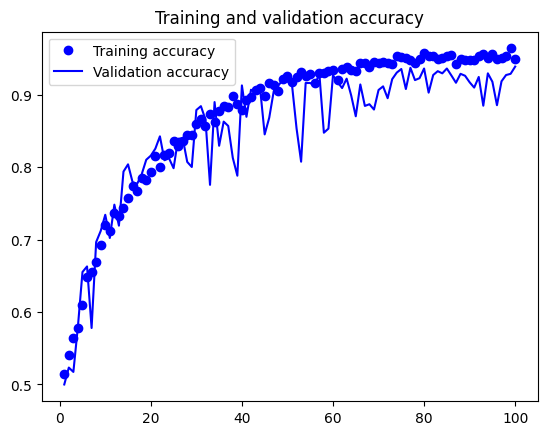

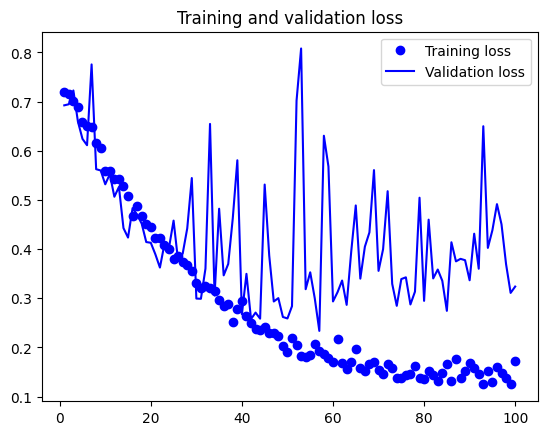

In [42]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 23ms/step - loss: 0.6443 - accuracy: 0.8180
Test accuracy: 0.818


## Leveraging a Pretraining Model

ImageNet- 1.4million labeled images and 1000 different classes
- animal classes - different specie of cats and dogs
- dogs vs cats 

## Feature Extraction and Fine Tuning

#### Feature Extraction with a pretrained model

In [45]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [46]:
from PIL import Image

In [55]:
data = Image.open(r'D:\books\Deep_Learning_With_Python_Francois_Chollet\train\cat.5.jpg')

In [57]:
import numpy as np

In [59]:
arr = np.array(data)

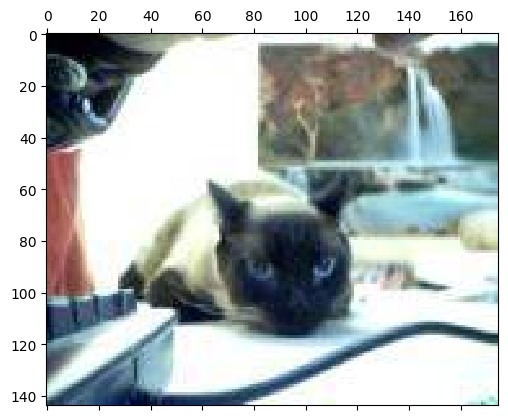

In [60]:
plt.matshow(arr)

In [269]:
trained_model = keras.models.load_model('convnet_from_scratch.tf')

In [270]:
from tensorflow.keras.preprocessing import image

In [284]:
img_path = 'dog2.jpg'
img = image.load_img(img_path,target_size=(180,180))
img_array= image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array,axis=0)

In [285]:
np.array(img).shape

(180, 180, 3)

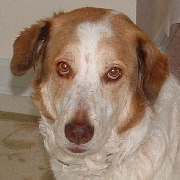

In [286]:
img

In [287]:
img_array.shape

(1, 180, 180, 3)

In [288]:
# img_array

In [ ]:
img_array

In [291]:
two_images[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[190.78703 , 168.12038 , 114.23148 ],
        [209.3074  , 165.35927 , 112.28148 ],
        [205.49445 , 170.23828 , 109.90494 ],
        ...,
        [131.8317  , 143.27615 ,  64.09707 ],
        [106.46324 , 121.74458 ,  42.8485  ],
        [105.93429 , 129.97623 ,  38.071922]],

       [[197.1926  , 175.52592 , 117.88333 ],
        [208.84444 , 167.69444 , 110.844444],
        [199.22037 , 164.56296 , 102.312965],
        ...,
        [127.639114, 138.08357 ,  64.60941 ],
        [112.22795 , 124.27785 ,  57.389057],
        [112.79609 , 129.55159 ,  57.883087]],

       [[203.91049 , 183.09875 , 118.700615],
        [206.30556 , 171.05556 , 109.30556 ],
        [201.69136 , 169.57407 , 105.0247  ],
        ...,
        [126.614365, 134.53413 ,  77.08653 ],
        [118.000244, 125.25023 ,  78.78722 ],
        [115.84238 , 123.32071 ,  80.93185 ]],

       ...,

       [[178.87311 , 197.78983 ,  85.12608 ],
        [155.

In [289]:
predictions = trained_model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_class

1/1 [==============================] - 0s 30ms/step


0

In [290]:
predictions

array([[1.2332823e-06]], dtype=float32)

In [154]:
img_path = 'cat.5.jpg'
img = image.load_img(img_path,target_size=(180,180))
img_array= image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array,axis=0)

In [155]:
img_array

array([[[[0.01176471, 0.00784314, 0.02745098],
         [0.00784314, 0.00392157, 0.02352941],
         [0.00392157, 0.        , 0.01960784],
         ...,
         [0.95686275, 0.99607843, 0.99215686],
         [0.9607843 , 1.        , 0.99607843],
         [0.9647059 , 1.        , 0.99607843]],

        [[0.        , 0.        , 0.01568628],
         [0.        , 0.        , 0.01568628],
         [0.        , 0.        , 0.01568628],
         ...,
         [0.94509804, 0.99215686, 0.9843137 ],
         [0.9411765 , 0.9882353 , 0.98039216],
         [0.9411765 , 0.98039216, 0.9764706 ]],

        [[0.        , 0.        , 0.01568628],
         [0.        , 0.        , 0.01568628],
         [0.        , 0.        , 0.01568628],
         ...,
         [0.93333334, 0.99607843, 0.99215686],
         [0.93333334, 0.99607843, 0.99215686],
         [0.9372549 , 0.99215686, 0.99215686]],

        ...,

        [[0.5058824 , 0.6117647 , 0.64705884],
         [0.4       , 0.5058824 , 0.54901963]

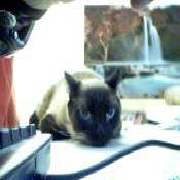

In [156]:
img

####

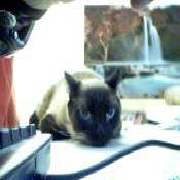

In [157]:
img

In [158]:
predictions = trained_model.predict(img_array)

predicted_class = (predictions >= 0.5).astype("int32")


print(f"Predicted class: {predicted_class[0][0]}") 

1/1 [==============================] - 0s 28ms/step
Predicted class: 0


In [144]:
predictions

array([[1.0531996e-10]], dtype=float32)

In [145]:
predictions[0][0]

1.0531996e-10

In [115]:
out = model.predict(test_dataset)

63/63 [==============================] - 2s 24ms/step


In [118]:
out

array([[9.4342333e-01],
       [1.0572535e-04],
       [9.9600011e-01],
       ...,
       [9.9987638e-01],
       [9.9993300e-01],
       [2.8097037e-07]], dtype=float32)

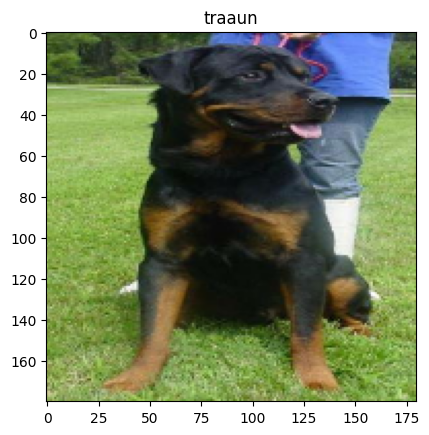

In [134]:
for images,labels in test_dataset.take(1):
    first_image = images[0].numpy().astype('uint8')
    plt.imshow(first_image)
    plt.title('traaun')
    plt.show()

### Using Prtrained Models

VGG16- imageNet

### Feature Extraction with a pretrained model

### 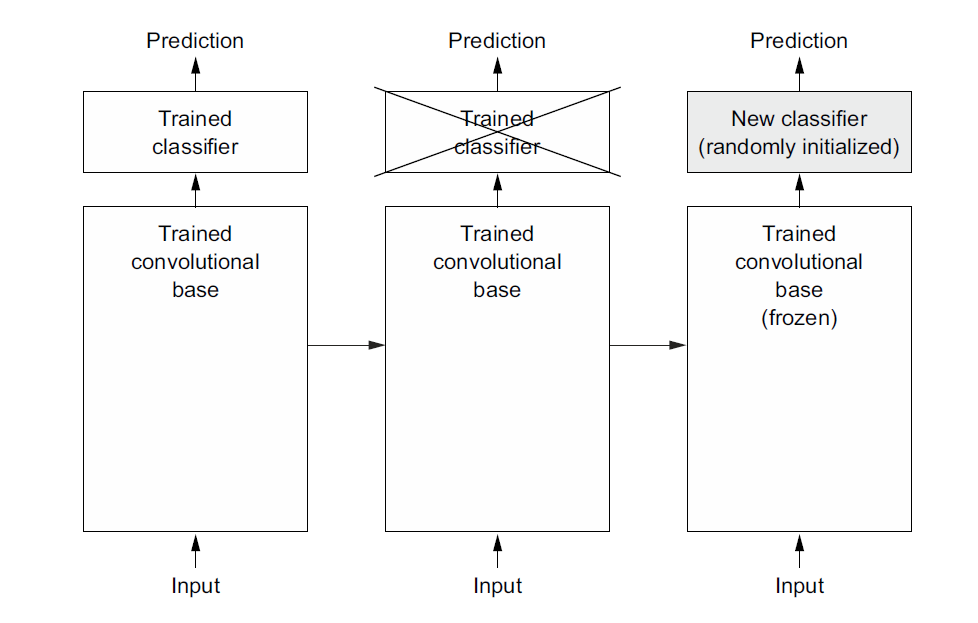

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

In [7]:
import pathlib

In [8]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
train_dataset = image_dataset_from_directory(new_base_dir / 'train',image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / 'validation',image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / 'test',image_size=(180,180),batch_size=32)

Found 2000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


- Xception
- ResNet
- MobileNet
- EfficientNet
- DenseNet

### Introduing VGG16

In [13]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',include_top=False,input_shape=(180,180,3)
)

58889256/58889256 [==============================] - 5s 0us/step


In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### Case-1

- Load convolutional base
- Extract features
- Save Features
- Train a Dense classifier

- Data Augmentation (Cheaper)

### Case-2

- Load convolutional base
- Apply data augmentation
- Extend the model(adding dense layers)
- Run everything end to end 

## Fast Feature Extraction without data augmentation

In [15]:
import numpy as np

In [23]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images,labels in dataset:
        preprocess_images = keras.applications.vgg16.preprocess_input(images)
        # print(preprocess_images)
        features = conv_base.predict(preprocess_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features),np.concatenate(all_labels)
        

In [24]:
train_features,train_labels = get_features_and_labels(train_dataset)
val_features,val_labels = get_features_and_labels(validation_dataset)
test_features,test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [25]:
train_features.shape

(2000, 5, 5, 512)

In [26]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs=  layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [28]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [29]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction.tf",
save_best_only=True,
monitor="val_loss")
]

In [30]:
history = model.fit(train_features,train_labels,epochs=20,validation_data=(val_features,val_labels),callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 36ms/step - loss: 16.3633 - accuracy: 0.9200 - val_loss: 3.4319 - val_accuracy: 0.9727
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 4.0728 - accuracy: 0.9765 - val_loss: 3.6663 - val_accuracy: 0.9783
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 2.8412 - accuracy: 0.9810 - val_loss: 1.8602 - val_accuracy: 0.9863
Epoch 4/20
63/63 [==============================] - 1s 22ms/step - loss: 0.7882 - accuracy: 0.9945 - val_loss: 1.7475 - val_accuracy: 0.9897
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.3494 - accuracy: 0.9895 - val_loss: 1.1175 - val_accuracy: 0.9937
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6129 - accuracy: 0.9950 - val_loss: 1.2900 - val_accuracy: 0.9923
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.7364 - accuracy: 0.9945 - val_loss: 1.8889 - val_accuracy: 0.9917
Epoch 8/20
63

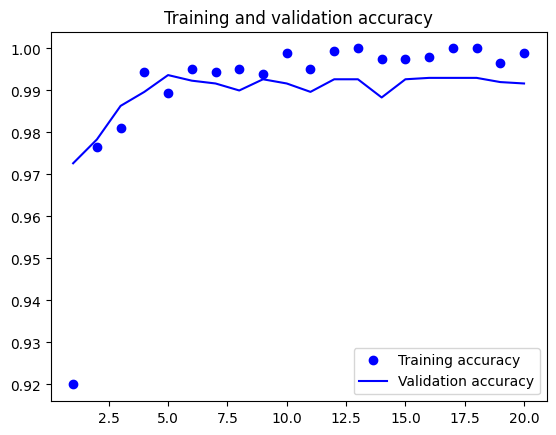

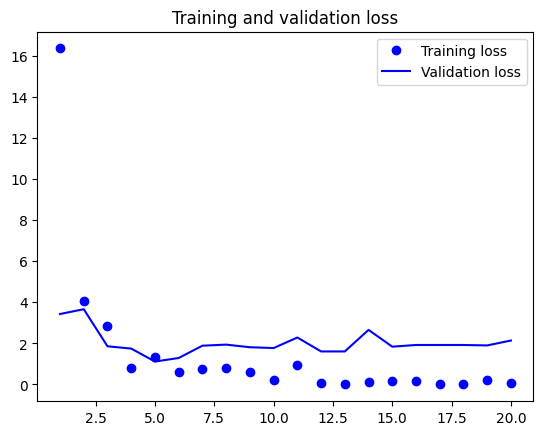

In [31]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Feature Extraction togather with data augmentation

In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
)


In [34]:
conv_base.trainable  = False

In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [36]:
conv_base.trainable = True
print('This is the number of trainable weights before freezing the conv base: ',len(conv_base.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base: ',len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base:  26
This is the number of trainable weights after freezing the conv base:  0


1- A data augmentation statge
2 - Our frozen convolutional base
3- A dense classifier

In [37]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)

In [38]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                           

In [41]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

In [44]:
history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 29s 383ms/step - loss: 23.6769 - accuracy: 0.8945 - val_loss: 7.4370 - val_accuracy: 0.9513
Epoch 2/50
63/63 [==============================] - 24s 380ms/step - loss: 8.5753 - accuracy: 0.9380 - val_loss: 2.5514 - val_accuracy: 0.9823
Epoch 3/50
63/63 [==============================] - 24s 376ms/step - loss: 3.6597 - accuracy: 0.9665 - val_loss: 2.7650 - val_accuracy: 0.9833
Epoch 4/50
63/63 [==============================] - 24s 379ms/step - loss: 4.7003 - accuracy: 0.9645 - val_loss: 1.3126 - val_accuracy: 0.9887
Epoch 5/50
63/63 [==============================] - 24s 378ms/step - loss: 2.0042 - accuracy: 0.9775 - val_loss: 7.6466 - val_accuracy: 0.9583
Epoch 6/50
63/63 [==============================] - 24s 378ms/step - loss: 2.3923 - accuracy: 0.9745 - val_loss: 2.5178 - val_accuracy: 0.9857
Epoch 7/50
63/63 [==============================] - 24s 380ms/step - loss: 2.9729 - accuracy: 0.9780 - val_loss: 2.1189 - val_accuracy: 0.986

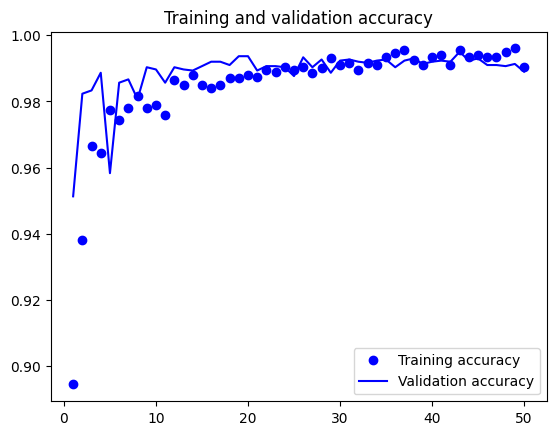

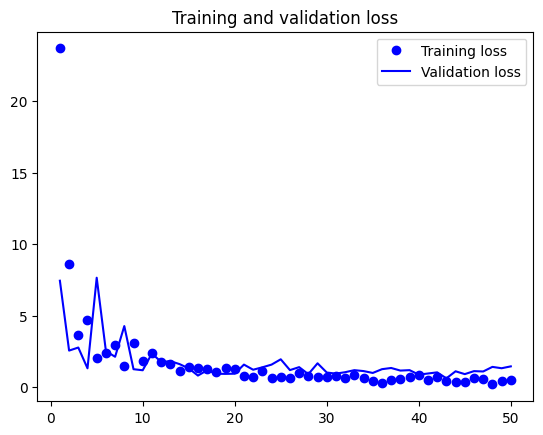

In [45]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [46]:
test_model = keras.models.load_model('feature_extraction_with_data_augmentation.keras')

In [53]:
test_loss,test_Acc = test_model.evaluate(test_dataset)
print(f"test accuracy: {test_Acc:.3f} ")

63/63 [==============================] - 6s 89ms/step - loss: 3.8056 - accuracy: 0.9780
test accuracy: 0.978 


In [54]:
# test_Acc

## Fine Tuning a model

Fine-tuning consists of unfreezing
a few of the top layers of a frozen model base used
for feature extraction, and jointly training both the
newly added part of the model (in this case, the
fully connected classifier) and these top layers. This
is called fine-tuning because it slightly adjusts the
more abstract representations of the model being
reused in order to make them more relevant for the
problem at hand.

### 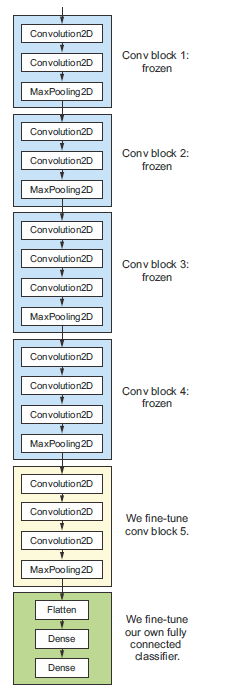

In [55]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [56]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',include_top=False,input_shape=(180,180,3)
)

In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [58]:
conv_base.trainable=True

In [59]:
for layer in conv_base.layers[:-4]:
    layer.trainable=False

In [60]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [61]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="fine_tuning.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 29s 384ms/step - loss: 6.6139 - accuracy: 0.9590 - val_loss: 1.1021 - val_accuracy: 0.9913
Epoch 2/30
63/63 [==============================] - 24s 381ms/step - loss: 3.6713 - accuracy: 0.9730 - val_loss: 0.9357 - val_accuracy: 0.9907
Epoch 3/30
63/63 [==============================] - 24s 382ms/step - loss: 3.5512 - accuracy: 0.9680 - val_loss: 0.8383 - val_accuracy: 0.9923
Epoch 4/30
63/63 [==============================] - 24s 382ms/step - loss: 2.3980 - accuracy: 0.9745 - val_loss: 0.8297 - val_accuracy: 0.9927
Epoch 5/30
63/63 [==============================] - 24s 378ms/step - loss: 2.4148 - accuracy: 0.9765 - val_loss: 0.8356 - val_accuracy: 0.9930
Epoch 6/30
63/63 [==============================] - 24s 380ms/step - loss: 2.2181 - accuracy: 0.9810 - val_loss: 0.8377 - val_accuracy: 0.9930
Epoch 7/30
63/63 [==============================] - 24s 379ms/step - loss: 2.8905 - accuracy: 0.9765 - val_loss: 0.8476 - val_accuracy: 0.9927

In [64]:
model = keras.models.load_model('fine_tuning.keras')
test_loss,test_acc = model.evaluate(test_dataset)
print(test_acc)

63/63 [==============================] - 6s 89ms/step - loss: 4.6562 - accuracy: 0.9745
0.9745000004768372
